## Sales Analysis

In [5]:
import pandas as pd
import glob
import os

In [6]:
files = [file for file in os.listdir('./sales_data')]
print(files)
all_data = pd.DataFrame()

for file in files:
    df=pd.read_csv('./sales_data/'+file)
    all_data = pd.concat([all_data,df])
    


['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [46]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [50]:
all_data['Month'] = 12

In [51]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",12
1,NaN,NaN,NaN,NaN,NaN,NaN,12
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",12
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12


## Getting All NaN

In [7]:
all_nan = all_data[all_data.isna().any(axis=1)]

In [54]:
all_nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,12
356,NaN,NaN,NaN,NaN,NaN,NaN,12
735,NaN,NaN,NaN,NaN,NaN,NaN,12
1433,NaN,NaN,NaN,NaN,NaN,NaN,12
1553,NaN,NaN,NaN,NaN,NaN,NaN,12


In [8]:
all_data = all_data.dropna(how='all')
all_nan = all_data[all_data.isna().any(axis=1)]
all_nan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [59]:
all_data = all_data.drop(columns=['Month'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [60]:
all_data = all_data.dropna(how='all')
all_nan = all_data[all_data.isna().any(axis=1)]
all_nan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [61]:
all_data.head(
)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [11]:
all_data = all_data[all_data['Order Date'].str[:2] != 'Or']


In [12]:
all_data['Month'] = all_data.loc[:,('Month')].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [71]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

### Adding Sales Column

In [13]:
all_data['Quantity Ordered'] = all_data.loc[:,('Quantity Ordered')].astype('int32')
all_data['Price Each'] = all_data.loc[:,('Price Each')].astype('float64')

In [77]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [14]:
all_data['Sales'] = all_data.loc[:,('Quantity Ordered')] * all_data.loc[:,('Price Each')]

In [79]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [15]:
result = all_data.groupby('Month').sum()

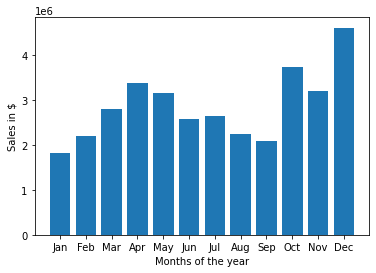

In [16]:
import matplotlib.pyplot as plt
import datetime

month_num = range(1,13)
month = [datetime.date(1900, m , 1).strftime('%b') for m in month_num]
month
plt.bar(month,result['Sales'])
plt.xticks(month)
plt.xlabel('Months of the year')
plt.ylabel('Sales in $')
plt.show()


#### Which city had the most sales

In [17]:
def get_city(d):
    return d.split(',')[1]

def get_state(d):
    return d.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x)+','+get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"


In [18]:
sales_city = all_data.groupby('City').sum()
sales_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta,GA",16602,2779908.20,104794,2795498.58
"Austin,TX",11153,1809873.61,69829,1819581.75
"Boston,MA",22528,3637409.77,141112,3661642.01
"Dallas,TX",16730,2752627.82,104620,2767975.40
"Los Angeles,CA",33289,5421435.23,208325,5452570.80
"New York City,NY",27932,4635370.83,175741,4664317.43
"Portland,ME",2750,447189.25,17144,449758.27
"Portland,OR",11303,1860558.22,70621,1870732.34
"San Francisco,CA",50239,8211461.74,315520,8262203.91


In [19]:
all_data[['Order ID','Product','Order Date' ]].head()

,Order ID,Product,Order Date
0,176558,USB-C Charging Cable,04/19/19 08:46
2,176559,Bose SoundSport Headphones,04/07/19 22:30
3,176560,Google Phone,04/12/19 14:38
4,176560,Wired Headphones,04/12/19 14:38
5,176561,Wired Headphones,04/30/19 09:27


In [20]:
sales_city[['Quantity Ordered','Sales']].sort_values('Sales',ascending=False)

,Quantity Ordered,Sales
City,,
"San Francisco,CA",50239,8262203.91
"Los Angeles,CA",33289,5452570.80
"New York City,NY",27932,4664317.43
"Boston,MA",22528,3661642.01
"Atlanta,GA",16602,2795498.58
"Dallas,TX",16730,2767975.40
"Seattle,WA",16553,2747755.48
"Portland,OR",11303,1870732.34
"Austin,TX",11153,1819581.75


In [120]:
sales_city.index

Index([' Atlanta,GA', ' Austin,TX', ' Boston,MA', ' Dallas,TX',
       ' Los Angeles,CA', ' New York City,NY', ' Portland,ME', ' Portland,OR',
       ' San Francisco,CA', ' Seattle,WA'],
      dtype='object', name='City')

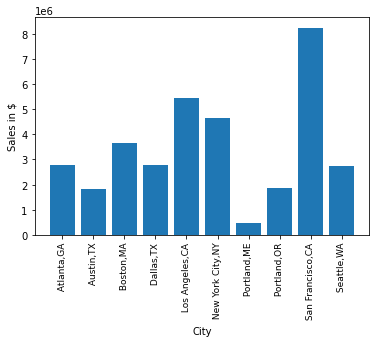

In [21]:
# city = all_data['City'].unique()
# city
# month = [datetime.date(1900, m , 1).strftime('%b') for m in month_num]

plt.bar(sales_city.index,sales_city['Sales'])
plt.xticks(sales_city.index,rotation='vertical',size=9)
plt.xlabel('City')
plt.ylabel('Sales in $')
plt.show()

###### Best time to display Advert

In [22]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [23]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX",8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA",22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",9


In [25]:
sales_hour = all_data.groupby('Hour').count()
sales_hour

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


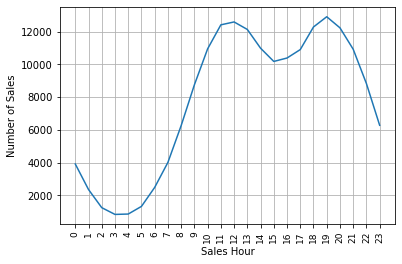

In [26]:
plt.plot(sales_hour.index,sales_hour['Quantity Ordered'])
plt.xticks(sales_hour.index,rotation='vertical',size=9)
plt.xlabel('Sales Hour')
plt.ylabel('Number of Sales')
plt.grid()
plt.show()

###  Find out which items were sold together the most

In [27]:
sold_together = all_data.loc[all_data['Order ID'].duplicated(keep=False)]
sold_together.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles,CA",19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston,MA",11


In [28]:
sold_together['Grouped'] = sold_together.groupby('Order ID')['Product'].transform(lambda x : ', '.join(x))
sold_together.head()

C:\Users\cruda\AppData\Local\Temp/ipykernel_3424/2148234408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_together['Grouped'] = sold_together.groupby('Order ID')['Product'].transform(lambda x : ', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",14,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",14,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",19,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles,CA",19,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston,MA",11,"Bose SoundSport Headphones, Bose SoundSport He..."


In [29]:
sd = sold_together[['Order ID','Grouped']].drop_duplicates()
sd.head()

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [30]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in sd['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list,2)))
    
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [31]:
for key,value in  count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [39]:
mostp = all_data.groupby('Product')
Quantity = mostp.sum()['Quantity Ordered']

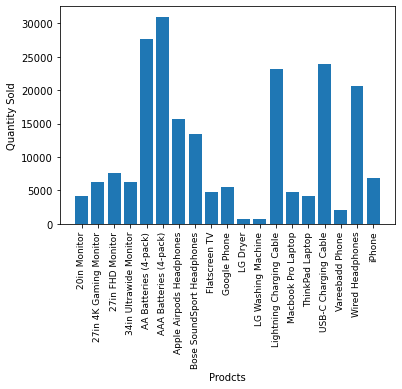

In [42]:
product = [product for product, df in mostp]

plt.bar(product,Quantity)
plt.xticks(product,rotation='vertical',size=9)
plt.xlabel('Prodcts')
plt.ylabel('Quantity Sold')
plt.show()

C:\Users\cruda\AppData\Local\Temp/ipykernel_3424/495893372.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation='vertical')


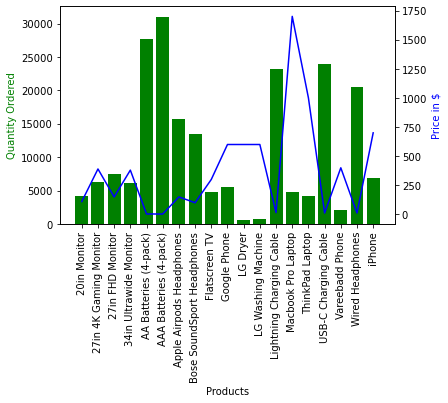

In [53]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product,Quantity,color = 'g')
ax2.plot(product,prices,'b-')
ax1.set_xticklabels(product,rotation='vertical')

ax1.set_xlabel('Products',)
ax1.set_ylabel('Quantity Ordered',color = 'g')
ax2.set_ylabel('Price in $',color='b')
plt.show()